<a href="https://colab.research.google.com/github/dinesh2018iitism/Learning-Data-Science-Using-AI-From-PW/blob/main/EDA_1_Assignment_Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title: Bike Details Dataset

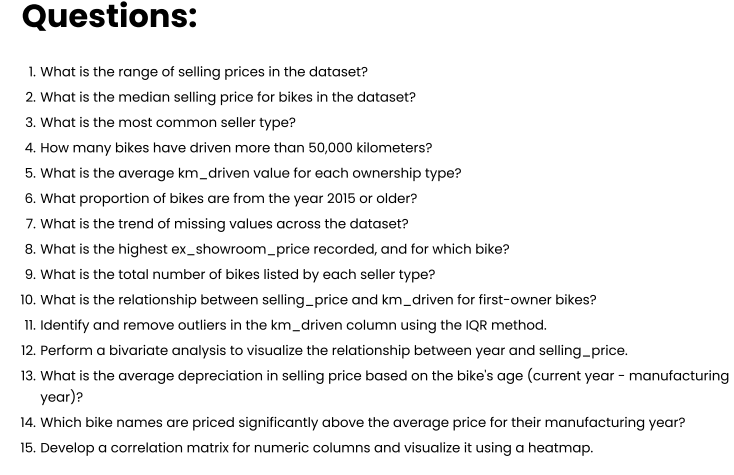

In [1]:
import pandas as pd

file_path = '/content/sample_data/BIKE DETAILS.csv'
bike_data = pd.read_csv(file_path)

print(bike_data.head())
selling_price_min = bike_data['selling_price'].min()
selling_price_max = bike_data['selling_price'].max()
selling_price_range = selling_price_max - selling_price_min

print("Minimum Selling Price:", selling_price_min)
print("Maximum Selling Price:", selling_price_max)
print("Range of Selling Prices:", selling_price_range)


                                  name  selling_price  year seller_type  \
0            Royal Enfield Classic 350         175000  2019  Individual   
1                            Honda Dio          45000  2017  Individual   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                Yamaha SZ [2013-2014]          20000  2011  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000           148114.0  
3  1st owner      23000            89643.0  
4  2nd owner      21000                NaN  
Minimum Selling Price: 5000
Maximum Selling Price: 760000
Range of Selling Prices: 755000


In [2]:
median_selling_price = bike_data['selling_price'].median()
print("Median Selling Price:", median_selling_price)


Median Selling Price: 45000.0


In [3]:
most_common_seller_type = bike_data['seller_type'].mode()[0]
print("Most Common Seller Type:", most_common_seller_type)


Most Common Seller Type: Individual


In [4]:
bikes_above_50k_km = bike_data[bike_data['km_driven'] > 50000].shape[0]
print("Number of Bikes Driven More Than 50,000 KM:", bikes_above_50k_km)


Number of Bikes Driven More Than 50,000 KM: 170


In [5]:
avg_km_by_owner = bike_data.groupby('owner')['km_driven'].mean()
print(avg_km_by_owner)


owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [6]:
bikes_2015_or_older = bike_data[bike_data['year'] <= 2015].shape[0]
proportion_2015_or_older = bikes_2015_or_older / bike_data.shape[0]
print("Proportion of Bikes from 2015 or Older:", proportion_2015_or_older)


Proportion of Bikes from 2015 or Older: 0.5664467483506126


In [7]:
missing_values_trend = bike_data.isnull().sum()
print(missing_values_trend)


name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [8]:
highest_ex_showroom_price = bike_data['ex_showroom_price'].max()
bike_with_highest_ex_showroom = bike_data[bike_data['ex_showroom_price'] == highest_ex_showroom_price]['name'].values[0]

print("Highest ex_showroom_price:", highest_ex_showroom_price)
print("Bike with Highest ex_showroom_price:", bike_with_highest_ex_showroom)


Highest ex_showroom_price: 1278000.0
Bike with Highest ex_showroom_price: Harley-Davidson Street Bob


In [9]:
bikes_by_seller_type = bike_data['seller_type'].value_counts()
print(bikes_by_seller_type)


seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


In [10]:
first_owner_bikes = bike_data[bike_data['owner'] == '1st owner']
print(first_owner_bikes[['selling_price', 'km_driven']])


      selling_price  km_driven
0            175000        350
1             45000       5650
2            150000      12000
3             65000      23000
5             18000      60000
...             ...        ...
1055          18000      35000
1056          17000     500000
1057          16000      33000
1059          12000      53000
1060          10000      92233

[924 rows x 2 columns]


In [11]:
Q1 = bike_data['km_driven'].quantile(0.25)
Q3 = bike_data['km_driven'].quantile(0.75)
IQR = Q3 - Q1
km_outliers_removed = bike_data[~((bike_data['km_driven'] < (Q1 - 1.5 * IQR)) |
                                  (bike_data['km_driven'] > (Q3 + 1.5 * IQR)))]

print(km_outliers_removed.shape)


(1022, 7)


In [12]:
year_vs_price = bike_data.groupby('year')['selling_price'].mean()
print(year_vs_price)


year
1988     20000.000000
1991      6000.000000
1993    130000.000000
1995    150000.000000
1997     17500.000000
1998     28333.333333
1999     15000.000000
2000     20833.333333
2001     40000.000000
2002     20666.666667
2003      8000.000000
2004     15100.000000
2005     16978.571429
2006     23380.000000
2007     24927.586207
2008     34289.285714
2009     22267.857143
2010     31793.333333
2011     35655.721311
2012     35748.400000
2013     51136.986301
2014     48668.131868
2015     56500.000000
2016     58469.018692
2017     78894.736842
2018     87660.374046
2019    119689.511628
2020    183333.333333
Name: selling_price, dtype: float64


In [13]:
current_year = 2024
bike_data['age'] = current_year - bike_data['year']
avg_depreciation = bike_data.groupby('age')['selling_price'].mean()
print(avg_depreciation)


age
4     183333.333333
5     119689.511628
6      87660.374046
7      78894.736842
8      58469.018692
9      56500.000000
10     48668.131868
11     51136.986301
12     35748.400000
13     35655.721311
14     31793.333333
15     22267.857143
16     34289.285714
17     24927.586207
18     23380.000000
19     16978.571429
20     15100.000000
21      8000.000000
22     20666.666667
23     40000.000000
24     20833.333333
25     15000.000000
26     28333.333333
27     17500.000000
29    150000.000000
31    130000.000000
33      6000.000000
36     20000.000000
Name: selling_price, dtype: float64


In [14]:
avg_price_by_year = bike_data.groupby('year')['selling_price'].mean()
bikes_above_avg_price = bike_data[bike_data.apply(
    lambda x: x['selling_price'] > avg_price_by_year[x['year']], axis=1)]
print(bikes_above_avg_price[['name', 'year', 'selling_price']])


                                      name  year  selling_price
0                Royal Enfield Classic 350  2019         175000
2      Royal Enfield Classic Gunmetal Grey  2018         150000
3        Yamaha Fazer FI V 2.0 [2016-2018]  2015          65000
7     Royal Enfield Bullet 350 [2007-2011]  2008         180000
13                           Yamaha YZF R3  2019         365000
...                                    ...   ...            ...
1004                  Bajaj Pulsar  NS 200  2016          60000
1005                    TVS Apache RTR 160  2014          60000
1008                    Bajaj Pulsar 220 F  2012          52000
1012                   Bajaj Pulsar NS 200  2014          50000
1023                Bajaj Avenger 220 dtsi  2012          45000

[334 rows x 3 columns]


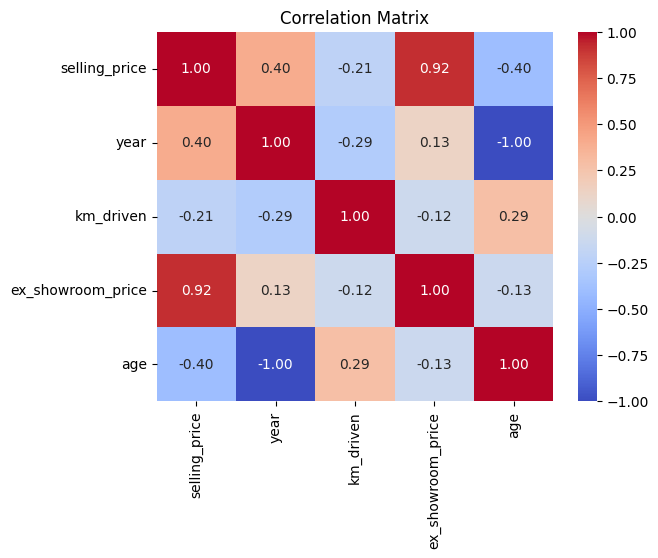

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_data = bike_data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
